First Notebook

In [21]:
import pandas as pd

df = pd.read_csv('../data/GalaxyZoo1_DR_table2.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667944 entries, 0 to 667943
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   OBJID          667944 non-null  int64  
 1   RA             667944 non-null  object 
 2   DEC            667944 non-null  object 
 3   NVOTE          667944 non-null  int64  
 4   P_EL           667944 non-null  float64
 5   P_CW           667944 non-null  float64
 6   P_ACW          667944 non-null  float64
 7   P_EDGE         667944 non-null  float64
 8   P_DK           667944 non-null  float64
 9   P_MG           667944 non-null  float64
 10  P_CS           667944 non-null  float64
 11  P_EL_DEBIASED  667944 non-null  float64
 12  P_CS_DEBIASED  667944 non-null  float64
 13  SPIRAL         667944 non-null  int64  
 14  ELLIPTICAL     667944 non-null  int64  
 15  UNCERTAIN      667944 non-null  int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 81.5+ MB


,OBJID,RA,DEC,NVOTE,P_EL,P_CW,P_ACW,P_EDGE,P_DK,P_MG,P_CS,P_EL_DEBIASED,P_CS_DEBIASED,SPIRAL,ELLIPTICAL,UNCERTAIN
0,587727178986356823,00:00:00.41,-10:22:25.7,59,0.610,0.034,0.000,0.153,0.153,0.051,0.186,0.610,0.186,0,0,1
1,587727227300741210,00:00:00.74,-09:13:20.2,18,0.611,0.000,0.167,0.222,0.000,0.000,0.389,0.203,0.797,1,0,0
2,587727225153257596,00:00:01.03,-10:56:48.0,68,0.735,0.029,0.000,0.147,0.074,0.015,0.176,0.432,0.428,0,0,1
3,587730774962536596,00:00:01.38,+15:30:35.3,52,0.885,0.019,0.000,0.058,0.019,0.019,0.077,0.885,0.077,0,1,0
4,587731186203885750,00:00:01.55,-00:05:33.3,59,0.712,0.000,0.000,0.220,0.068,0.000,0.220,0.640,0.290,0,0,1


In [23]:
from astropy.coordinates import SkyCoord
from astropy import units as u

ra_str = "00:00:00.74"
dec_str = "-09:13:20.2"

coord = SkyCoord(ra_str, dec_str, unit=(u.hourangle, u.deg), frame="icrs")
print(f"RA (deg): {coord.ra.deg}")
print(f"DEC (deg): {coord.dec.deg}")

RA (deg): 0.003083333333333333
DEC (deg): -9.222277777777778


In [15]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

fits_image_filename = fits.util.get_testdata_filepath('test0.fits')
print(fits_image_filename)

hdul = fits.open(fits_image_filename)

hdul.info()


/home/jburbidge/projects/python/galaxy-zoo/venv/lib/python3.11/site-packages/astropy/io/fits/tests/data/test0.fits
Filename: /home/jburbidge/projects/python/galaxy-zoo/venv/lib/python3.11/site-packages/astropy/io/fits/tests/data/test0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     138   ()      
  1  SCI           1 ImageHDU        61   (40, 40)   int16   
  2  SCI           2 ImageHDU        61   (40, 40)   int16   
  3  SCI           3 ImageHDU        61   (40, 40)   int16   
  4  SCI           4 ImageHDU        61   (40, 40)   int16   


Filename: ../data/GalaxyZoo1_DR_table2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      14   (1253,)   uint8   
  1                1 BinTableHDU     47   667944R x 16C   [K, 11A, 11A, I, E, E, E, E, E, E, E, E, E, I, I, I]   
Header
SIMPLE  =                    T / Standard FITS format                           BITPIX  =                    8 / Character data                                 NAXIS   =                    1 / Text string                                    NAXIS1  =                 1253 / Number of characters                           VOTMETA =                    T / Table metadata in VOTable format               EXTEND  =                    T / There are standard extensions                  COMMENT                                                                         COMMENT The data in this primary HDU consists of bytes which                    COMMENT comprise a VOTABLE document.                                    

TypeError: Invalid shape (1253,) for image data

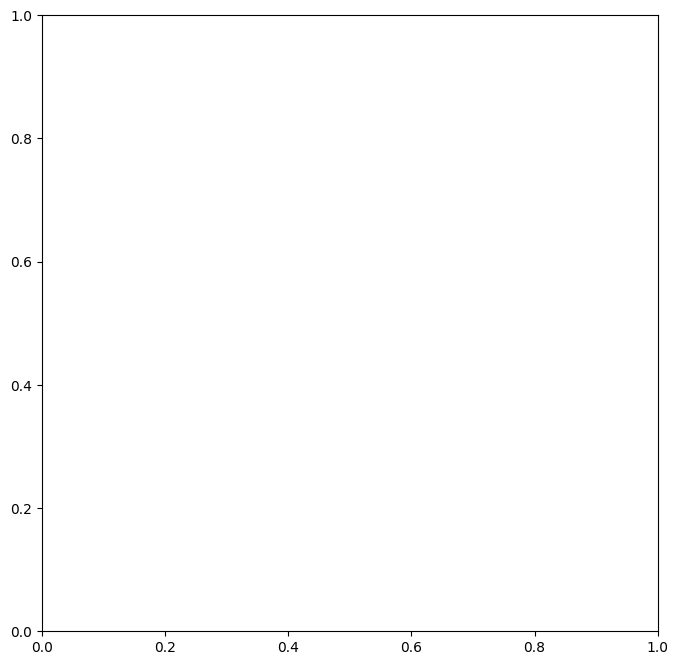

In [17]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

# Open a FITS file
file_path = "../data/GalaxyZoo1_DR_table2.fits"
hdul = fits.open(file_path)

# Inspect the structure
hdul.info()

# Access primary image data
image_data = hdul[0].data
header = hdul[0].header

print("Header")
print(header)

print("Image")
print(image_data)

hdul.close()

# Show basic stats
print(f"Shape: {image_data.shape}")
print(f"Exposure Time: {header.get('EXPTIME', 'N/A')}")

# Display the image
plt.figure(figsize=(8, 8))
plt.imshow(image_data, cmap='gray', origin='lower', vmin=np.percentile(image_data, 1), vmax=np.percentile(image_data, 99))
plt.colorbar()
plt.title("FITS Image")
plt.xlabel("X pixel")
plt.ylabel("Y pixel")
plt.show()
